In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/brasil-real-estate-2.csv
/kaggle/input/dataset/mexico-real-estate-1.csv
/kaggle/input/dataset/mexico-real-estate-clean.csv
/kaggle/input/dataset/brasil-real-estate-1.csv
/kaggle/input/dataset/mexico-real-estate-3.csv
/kaggle/input/dataset/mexico-real-estate-2.csv


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [7]:
df1=pd.read_csv('/kaggle/input/dataset/mexico-real-estate-1.csv',encoding='latin-1')
df2=pd.read_csv('/kaggle/input/dataset/mexico-real-estate-2.csv',encoding='latin-1')
df3=pd.read_csv('/kaggle/input/dataset/mexico-real-estate-3.csv',encoding='latin-1')

In [9]:
df1.head()
df2.head()
df3.head()

,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


**Start with df1**

In [10]:
df1.shape

(700, 7)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     700 non-null    int64  
 1   property_type  700 non-null    object 
 2   state          700 non-null    object 
 3   lat            583 non-null    float64
 4   lon            583 non-null    float64
 5   area_m2        700 non-null    int64  
 6   price_usd      700 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 38.4+ KB


In [12]:
df1.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,2,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,3,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,4,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,5,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


In [13]:
df1.dropna(inplace=True)

df1["price_usd"]=(
df1["price_usd"].str.replace("$","",regex=False)
    .str.replace(",","")
    .astype(float)
)
df1.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150,67965.56
1,2,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,3,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,4,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,6,house,Yucatán,21.052583,-89.538639,205,105191.37


In [14]:
df2.dropna(inplace=True)
 
df2["price_usd"]=(df2["price_mxn"]/19).round(2)
df2.drop(columns=["price_mxn"],inplace=True)
df2.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,apartment,Nuevo León,25.721081,-100.345581,72,68421.05
2,3,house,Morelos,23.634501,-102.552788,360,278947.37
6,7,apartment,Estado de México,19.272040,-99.572013,85,65789.47
7,8,house,San Luis Potosí,22.138882,-100.996510,158,111578.95
8,9,apartment,Distrito Federal,19.394558,-99.129707,65,39904.74


In [15]:
df3.dropna(inplace=True)
df3[["lat","lon"]]=df3["lat-lon"].str.split(",",expand=True)
df3.head()

,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.52589,-99.151703
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.2640539,-99.5727534
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956
5,6,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175,102763.00,20.689157,-103.366728


In [16]:
df3["state"]= df3["place_with_parent_names"].str.split("|",expand=True)[2]
df3.drop(columns=["place_with_parent_names","lat-lon"],inplace=True)
df3.head()

,Unnamed: 0,property_type,area_m2,price_usd,lat,lon,state
0,1,apartment,71,48550.59,19.52589,-99.151703,Distrito Federal
1,2,house,233,168636.73,19.2640539,-99.5727534,Estado de México
2,3,house,300,86932.69,19.268629,-99.671722,Estado de México
4,5,apartment,84,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,6,house,175,102763.00,20.689157,-103.366728,Jalisco


In [17]:
df = pd.concat([df1,df2,df3])
print(df.shape)
df.head()

(1736, 7)


,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150,67965.56
1,2,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,3,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,4,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,6,house,Yucatán,21.052583,-89.538639,205,105191.37


In [20]:
df=pd.read_csv('/kaggle/input/dataset/mexico-real-estate-clean.csv',encoding='latin-1')
df.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150,67965.56
1,2,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,3,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,4,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,5,house,Yucatán,21.052583,-89.538639,205,105191.37


In [21]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

Use the value_counts method on the "state" column to determine the 10 most prevalent states in our dataset.

In [22]:
df["state"].value_counts().head()

Distrito Federal    198
Estado de México    125
Morelos             112
Yucatán             101
Querétaro            92
Name: state, dtype: int64

In [23]:
df[["area_m2","price_usd"]].describe()

,area_m2,price_usd
count,1158.000000,1158.000000
mean,171.002591,115618.467409
std,81.460878,65118.870411
min,60.000000,33157.890000
25%,101.250000,65789.470000
50%,157.000000,99525.565000
75%,220.000000,152790.800000
max,383.000000,326733.660000


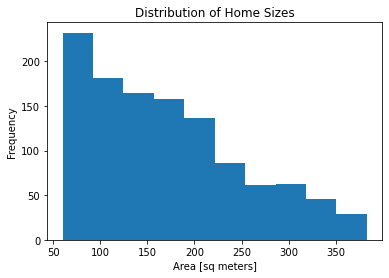

In [24]:
plt.hist(df['area_m2'])
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes");

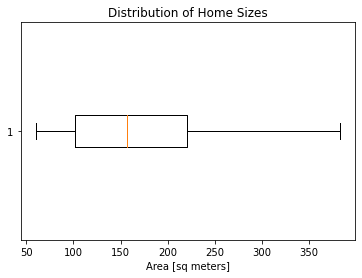

In [25]:
plt.boxplot(df["area_m2"], vert=False)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Sizes");

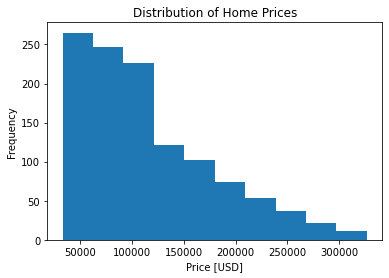

In [26]:
plt.hist(df["price_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices");

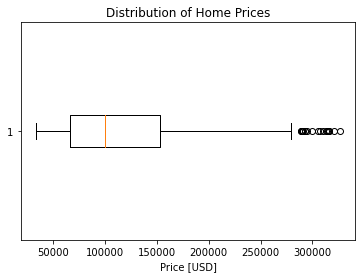

In [27]:
plt.boxplot(df["price_usd"],vert=False)
plt.xlabel("Price [USD]")
plt.title("Distribution of Home Prices");

In [28]:
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state

state
Nuevo León                         141345.640179
Chihuahua                          141077.628125
Guanajuato                         134962.701111
Jalisco                            134624.989767
Quintana Roo                       129976.002500
Querétaro                          129057.848261
Distrito Federal                   124150.289444
Aguascalientes                     123994.585000
Estado de México                   121912.910080
Campeche                           121734.633333
Guerrero                           119997.134722
Sonora                             119457.996250
Puebla                             118562.562632
Baja California Sur                118078.596667
Morelos                            107866.682679
Yucatán                            106886.575743
Nayarit                            106037.456667
Sinaloa                            102618.940667
Veracruz de Ignacio de la Llave    101631.666575
Chiapas                            100734.630556
San Luis Potos

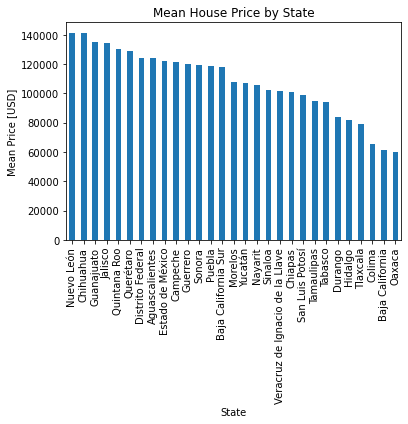

In [29]:
mean_price_by_state.plot(
     kind="bar",
    xlabel="State",
    ylabel="Mean Price [USD]",
    title="Mean House Price by State"
    
);

In [30]:
df["price_per_m2"] = df["price_usd"]/df["area_m2"]
df.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,1,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,2,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,3,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,4,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,5,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


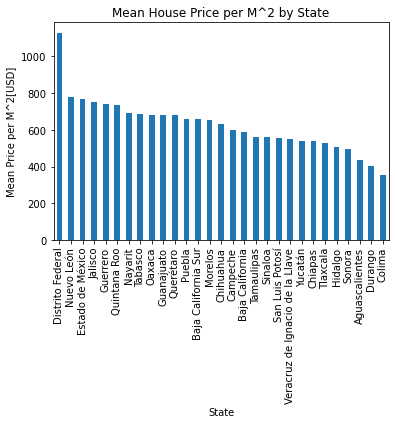

In [31]:
(
df.groupby("state")["price_per_m2"].mean()
    .sort_values(ascending=False)
    .plot(
    kind="bar",
        xlabel="State",
        ylabel="Mean Price per M^2[USD]",
        title="Mean House Price per M^2 by State"
    )
);

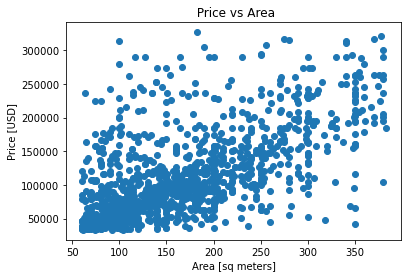

In [32]:
plt.scatter(x=df["area_m2"],y=df["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title(" Price vs Area");

In [33]:
p_correlation = df["area_m2"].corr(df["price_usd"])
print(p_correlation)

0.6059798536524275


In [34]:
df_morelos = df[df["state"]=="Morelos"]
df_morelos.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,7,house,Morelos,23.634501,-102.552788,360,278947.37,774.853806
26,27,house,Morelos,18.813908,-99.201675,86,52631.58,611.995116
36,37,house,Morelos,18.893921,-99.221429,160,150000.00,937.500000
52,53,house,Morelos,18.934090,-99.254997,240,178947.37,745.614042
55,56,apartment,Morelos,18.923538,-99.241848,110,57894.74,526.315818


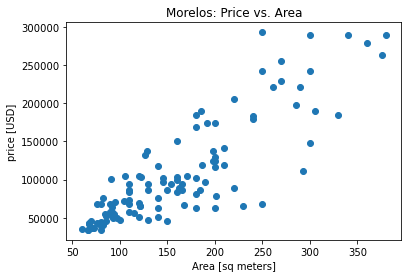

In [35]:
plt.scatter(x=df_morelos["area_m2"],y=df_morelos["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("price [USD]")
plt.title("Morelos: Price vs. Area");

In [36]:
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])
print(p_correlation)

0.8500562578856505


0.45074776408423356


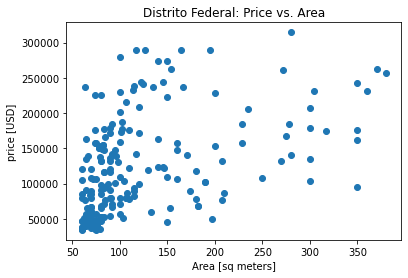

In [37]:
# Subset `df` to include only observations from `"Distrito Federal"`
df_mexico_city = df[df["state"]== "Distrito Federal"]


# Create a scatter plot price vs area
plt.scatter(x=df_mexico_city["area_m2"],y=df_mexico_city["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("price [USD]")
plt.title("Distrito Federal: Price vs. Area");

p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])
print(p_correlation)